# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(20)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# check for missing data
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [8]:
#  1. Get the total rides for each city type
ride_type_count=pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_type_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [11]:
# 2. Get the total drivers for each city type
driver_type_sum=city_data_df.groupby(["type"]).sum()["driver_count"]
driver_type_sum

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [12]:
#  3. Get the total amount of fares for each city type
total_fare_type_sum=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_type_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
#  4. Get the average fare per ride for each city type. 
mean_fare_type=pyber_data_df.groupby(["type"]).mean()["fare"]
mean_fare_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [26]:
# 5. Get the average fare per driver for each city type. 
#mean_fare_driver=pyber_data_df.groupby(["driver_count"]).mean()["fare"]
#print(mean_fare_driver)
mean_fare_driver_type=total_fare_type_sum/driver_type_sum
mean_fare_driver_type


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [51]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame(
    {"Total Rides": ride_type_count,
    "Total Drivers":driver_type_sum,
    "Total Fares": total_fare_type_sum,
    "Average Fare per Ride":mean_fare_type,
    "Average Fare per Driver":mean_fare_driver_type})
print(pyber_summary_df)
    

          Total Rides  Total Drivers  Total Fares  Average Fare per Ride  \
type                                                                       
Rural             125             78      4327.93              34.623440   
Suburban          625            490     19356.33              30.970128   
Urban            1625           2405     39854.38              24.525772   

          Average Fare per Driver  
type                               
Rural                   55.486282  
Suburban                39.502714  
Urban                   16.571468  


In [52]:
pyber_summary_df=pd.DataFrame(pyber_summary_df)

In [53]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [54]:
#  8. Format the columns.
pyber_summary_df['Total Fares']=pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride']=pyber_summary_df['Average Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Driver']=pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)
print(pyber_summary_df)

          Total Rides  Total Drivers Total Fares Average Fare per Ride  \
Rural             125             78   $4,327.93                $34.62   
Suburban          625            490  $19,356.33                $30.97   
Urban            1625           2405  $39,854.38                $24.53   

         Average Fare per Driver  
Rural                     $55.49  
Suburban                  $39.50  
Urban                     $16.57  


In [55]:
pyber_summary_df=pd.DataFrame(pyber_summary_df)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [56]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [57]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_fare_sum_df=pyber_data_df.groupby(["type", "date"]).sum()["fare"]
type_date_fare_sum_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [65]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_date = type_date_fare_sum_df.reset_index()
type_date.head(10)

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [69]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type_date['date']= pd.to_datetime(type_date['date'])

fare_jan_apr.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [70]:
# 7. Check that the datatype for the index is datetime using df.info()
type_date.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [71]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_pivot = type_date.pivot(index="date", columns="type", values="fare")
type_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [72]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fare_jan_apr = type_date_pivot.loc['2019-01-01':'2019-04-29']
fare_jan_apr

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [76]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the 
#fares for each week.
weekly_fares_df = fare_jan_apr.resample('W').sum()
weekly_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [77]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



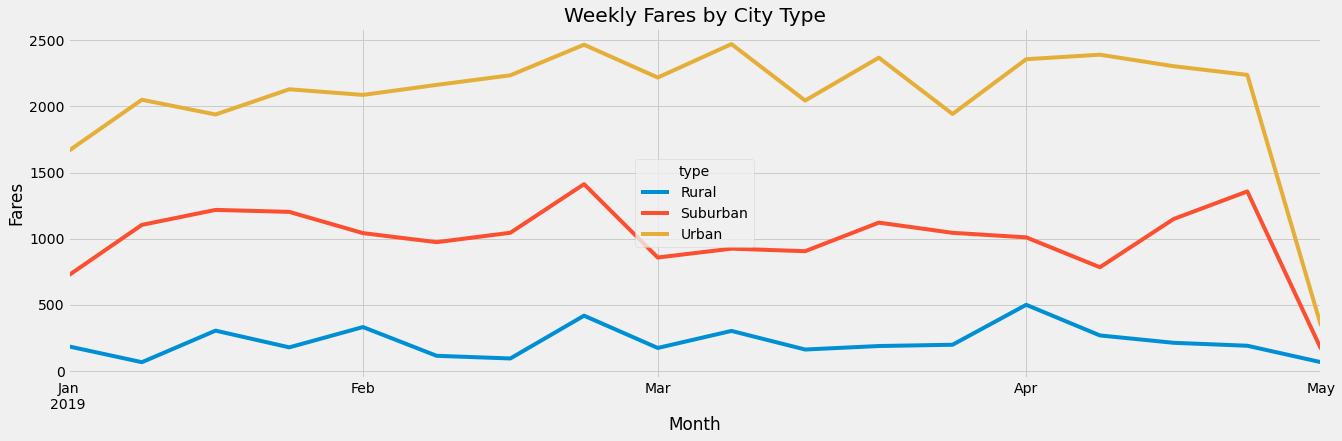

<Figure size 432x288 with 0 Axes>

In [78]:
weekly_fares = weekly_fares_df.plot(figsize = (20,6))
# Add a title 
weekly_fares.set_title("Weekly Fares by City Type")
#  Add a x- and y-axis label.
weekly_fares.set_xlabel("Month")
weekly_fares.set_ylabel("Fares")


plt.tight_layout()
plt.savefig("PyBer_fare_summary.png")

In [ ]:
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html
# https://matplotlib.org/3.1.0/api/index.html#the-pyplot-api
# https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.plot.html
# https://matplotlib.org/3.1.0/api/axes_api.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter
# https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py
# https://docs.python.org/3.6/tutorial/datastructures.html#list-comprehensions
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.scatter.html
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py
# https://matplotlib.org/3.1.1/gallery/color/named_colors.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.scatter
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.pie.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.errorbar.html
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.bar.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.bar.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://numpy.org/
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
# https://matplotlib.org/3.1.0/gallery/ticks_and_spines/major_minor_demo.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.axes.Axes.legend.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
# https://matplotlib.org/3.1.1/gallery/index.html#statistics
# https://matplotlib.org/examples/statistics/boxplot_demo.html
# https://matplotlib.org/users/customizing.html